# Sales Prediction for Big Mart Outlets

Sudhakar Kumar (183236001)

This problem statement is being taken from the one of the datahacks organized by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/). 

![AV datahack](images/bigmart-av.png)

I worked on this regression problem using a bunch of machine learning models and participated in the competition with the model. **The final model fetched an RMSE of 1151.61 and could manage to get in top 18% (630/3638) of the submissions, where the top model was having an RMSE of 1128.19**. 

In the upcoming sections, I will explain all the steps used for implementing the model. Some of the resources, which I have found instrumental for solving this problem are as given below:

1.   https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/
2.   https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 


## Problem Statement
The data scientists at **Big Mart** have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

## Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set. We can conclude that this is a **supervised machine learning regression** problem. 

We will explore the problem in the following stages:

* **Hypothesis Generation** – understanding the problem better by brainstorming possible factors that can impact the outcome
* **Exploratory Data Analysis** – looking at categorical and continuous feature summaries and thus, making inferences about the data.
* **Data Cleaning** – imputing missing values in the data
* **Feature Engineering** – modifying existing variables and creating new ones for analysis
* **Model Building** – making predictive models on the data using regression techniques 

## Hypothesis Generation


### Store Level Hypotheses

* **City type**: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
* **Population Density**: Stores located in densely populated areas should have higher sales because of more demand.
* **Store Capacity**: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
* **Competitors**: Stores having similar establishments nearby should have less sales because of more competition.
* **Marketing**: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
* **Location**: Stores located within popular marketplaces should have higher sales because of better access to customers.

### Product Level Hypotheses

* **Brand**: Branded products should have higher sales because of higher trust in the customer.
* **Packaging**: Products with good packaging can attract customers and sell more.
* **Utility**: Daily use products should have a higher tendency to sell as compared to the specific use products.
* **Display Area**: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
* **Visibility in Store**: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

We can think about other parameters like advertising, promotional offers, etc. which might impact the sales. For now, we will proceed towards exploratory data analysis. 

## Exploratory Data Analysis 

We will look at the data and try to identify the information which we hypothesized vs the available data. As given on the competition [website](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement), the `train` dataset has the following attributes: 

* `Item_Identifier`	--  Unique product ID.
* `Item_Weight`	-- Weight of product.
* `Item_Fat_Content` -- Whether the product is low fat or not.
* `Item_Visibility`	-- The % of total display area of all products in a store allocated to the particular product. Related to **Display Area** hypotheses. 
* `Item_Type`	-- The category to which the product belongs.
* `Item_MRP`	-- Maximum Retail Price (list price) of the product.
* `Outlet_Identifier`	-- Unique store ID.
* `Outlet_Establishment_Year`	-- The year in which store was established.
* `Outlet_Size`	-- The size of the store in terms of ground area covered. Related to **Store Capacity** hypotheses.
* `Outlet_Location_Type`	-- The type of city in which the store is located. Related to **City type** hypotheses. 
* `Outlet_Type`	-- Whether the outlet is just a grocery store or some sort of supermarket. Related to **Store Capacity** hypotheses.
* `Item_Outlet_Sales`	-- Sales of the product in the particular store. This is the outcome variable to be predicted.

On the other hand, the `test` dataset has all the above mentioned attributes except `Item_Outlet_Sales`. As a part of the competition, we have to predict the `Item_Outlet_Sales` for all the items in the `test` dataset and submit a csv file with three columns, as given below: 

* `Item_Identifier`	-- Unique product ID
* `Outlet_Identifier`	-- Unique store ID
* `Item_Outlet_Sales`	-- Sales of the product in the particular store. This is the outcome variable to be predicted.

Let’s start by loading the required libraries and data. The `train` and `test` data sets are available on the competition [website](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement). 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train_v9rqX0R.csv")
train.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4161,DRI23,18.850,Low Fat,0.137973,Hard Drinks,158.4578,OUT017,2007,NaN,Tier 2,Supermarket Type1,1444.1202
344,FDJ22,NaN,Low Fat,0.092464,Snack Foods,190.9504,OUT019,1985,Small,Tier 1,Grocery Store,383.5008
4985,FDT14,10.695,Regular,0.127621,Dairy,119.2440,OUT013,1987,High,Tier 3,Supermarket Type1,3475.4760
2636,FDT33,7.810,Regular,0.034044,Snack Foods,168.7158,OUT049,1999,Medium,Tier 1,Supermarket Type1,2673.8528
5815,FDT57,15.200,Low Fat,0.019031,Snack Foods,235.5248,OUT035,2004,Small,Tier 2,Supermarket Type1,4740.4960
3250,FDX38,10.500,Regular,0.048167,Dairy,48.8376,OUT013,1987,High,Tier 3,Supermarket Type1,671.1264
6057,DRA59,NaN,Regular,0.127308,Soft Drinks,186.6924,OUT027,1985,Medium,Tier 3,Supermarket Type3,7033.5112
5794,FDI09,20.750,Regular,0.000000,Seafood,239.9880,OUT045,2002,NaN,Tier 2,Supermarket Type1,2636.5680
1151,FDK43,9.800,Low Fat,0.026993,Meat,127.3020,OUT017,2007,NaN,Tier 2,Supermarket Type1,2277.0360
3434,FDT39,6.260,Regular,0.009924,Meat,152.8366,OUT017,2007,NaN,Tier 2,Supermarket Type1,3778.4150


In [3]:
print("train data has {} rows and {} columns".format(train.shape[0], train.shape[1]))

train data has 8523 rows and 12 columns


In [4]:
test = pd.read_csv("test_AbJTz2l.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print("test data has {} rows and {} columns".format(test.shape[0], test.shape[1]))

test data has 5681 rows and 11 columns


Its generally a good idea to combine both `train` and `test` datasets into one, perform feature engineering and then divide them later again. We will combine `train` and `test` into a dataframe `data` with a `source` column specifying where each observation belongs.

In [6]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], axis = 0)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


Thus we can see that `data` has same number of columns (as that in `train` dataset) but rows equivalent to both `test` and `train` taken together. 

In [7]:
data.sample(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
770,Regular,FDH53,80.9592,NaN,Frozen Foods,0.019230,20.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,test
2926,reg,FDV28,35.3558,NaN,Frozen Foods,0.160052,16.10,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
5118,Regular,FDC29,112.7176,1832.2816,Frozen Foods,0.024088,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
377,Regular,FDF45,57.7904,1464.7600,Fruits and Vegetables,0.012195,18.20,1987,OUT013,Tier 3,High,Supermarket Type1,train
5557,Low Fat,FDC20,56.2272,559.2720,Fruits and Vegetables,0.024069,10.65,2009,OUT018,Tier 3,Medium,Supermarket Type2,train


One of the key challenges in any dataset is missing values. We will begin by checking which columns contain missing values.

In [8]:
print(data.isna().sum())

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64


As we know that the `Item_Outlet_Sales` is the target variable and its missing values are the ones which are present in the `test` dataset. So we will leave this column as it is. However, we need to impute the missing values in `Item_Weight` and `Outlet_Size`. 

Next, we will have a look at some basic statistics for numerical variables.

In [9]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


From the above mentioned statistics, we can observe that 

* `Item_Visibility` has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
* `Outlet_Establishment_Year` varies from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
* The lower `count` of `Item_Weight` and `Item_Outlet_Sales` substantiates the fact that there are missing values in these two columns.

Next, we will have a look at the number of unique values in each of the columns.

In [10]:
data.apply(lambda x : len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

The above mentioned result tells us that that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that `Item_Type` has 16 unique values. We will explore it further using the frequency of different categories in each variable. Also, we will not include `Item_Identifier`,`Outlet_Identifier`,`source` for obvious reasons.

In [11]:
# Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# Exclude ID cols and source
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

for col in categorical_columns:
    print('Frequency of categories for {}'.format(col))
    print(data[col].value_counts())
    print("="*50)

Frequency of categories for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of categories for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of categories for Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of categories for Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency of categories for Outlet_Typ

The above mentioned output provides us with the following observations:

* `Item_Fat_Content`: Some of `Low Fat` values are incorrectly coded as `low fat` and `LF`. Also, some of `Regular` values are mentioned as `regular`.
* `Item_Type`: Not all categories have substantial numbers. Maybe, combining them can give better results.

## Data Cleaning 

Here, we will deal with the imputation of missing values. In the previous section, we noticed that there are two variables with missing values -- `Item_Weight` and `Outlet_Size`. We will impute the `Item_Weight` by the average weight of the particular item. 

In [12]:
# Determine the average weight per item
item_avg_weight = data.groupby('Item_Identifier')['Item_Weight'].mean()

# Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

# Impute data
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x : item_avg_weight[x])

In [13]:
print(data['Item_Weight'].isna().sum())

0


Now, we will impute the `Outlet_Size` with the mode of the `Outlet_Size` for the particular type of outlet.

In [14]:
from scipy.stats import mode

# Determing the mode for each
outlet_size_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type',
                                    aggfunc = (lambda x : mode(x).mode[0]))

# Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

# Impute data
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x : outlet_size_mode[x])

In [15]:
print(data.isna().sum())

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64


The above mentioned output confirms that there are no missing values now. Remember, `Item_Outlet_Sales` is the target variable and its missing values are the ones which are present in the `test` dataset.

## Feature Engineering 

In the section **Exploratory Data Analysis**, we noticed that the minimum value of `Item_Visibility` is 0, which makes no practical sense. We will treat the zero entries as missing values and hence we need to impute these with mean visibility of that particular item. 

In [16]:
print(len(data[data['Item_Visibility'] == 0]))

879


In [17]:
# Determine average visibility of a product
visibility_avg = data.groupby('Item_Identifier')['Item_Visibility'].mean()

# Impute zero entries with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x : visibility_avg[x])

In [18]:
print(len(data[data['Item_Visibility'] == 0]))

0


In the section **Hypothesis Generation**, we inferred that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we need to look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We will add a new column `Item_Visibility_MeanRatio` by using the `visibility_avg` variable defined above. 

In [19]:
# Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x : x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In the section **Exploratory Data Analysis** we saw that `Item_Type` variable has 16 categories which might prove to be very useful in analysis. So it might be a good idea to combine them.  If we look at the entries of `Item_Identifier`, i.e. the unique ID of each item, it starts with either `FD`, `DR` or `NC`. If we see the categories, these look like being Food, Drinks and Non-Consumables. So we can use used `Item_Identifier` variable to create a new column. 

In [20]:
data['Item_Identifier'].sample(10)

3212    FDI44
3503    FDL45
7334    NCB55
3645    FDU32
6777    FDV60
2987    NCK42
3097    FDI36
2496    FDQ26
1116    FDL39
3594    DRC36
Name: Item_Identifier, dtype: object

In [21]:
# Get the first two characters of ID
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])

# Rename them to more intuitive categories
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()


Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [22]:
data.sample(8)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined
7943,Low Fat,NCE31,33.6216,934.7832,Household,0.183948,7.670,1985,OUT027,Tier 3,Medium,Supermarket Type3,train,0.870493,Non-Consumable
1785,Regular,FDQ28,155.0656,NaN,Frozen Foods,0.105800,14.000,1985,OUT019,Tier 1,Small,Grocery Store,test,1.679003,Food
1228,Low Fat,FDU52,154.4630,2503.4080,Frozen Foods,0.064031,7.560,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,1.028941,Food
5647,Regular,DRY23,43.8112,NaN,Soft Drinks,0.109318,9.395,2002,OUT045,Tier 2,Small,Supermarket Type1,test,0.924160,Drinks
1352,Low Fat,NCZ06,253.8698,NaN,Household,0.094353,19.600,2002,OUT045,Tier 2,Small,Supermarket Type1,test,0.924160,Non-Consumable
7221,Low Fat,FDP33,256.3672,255.6672,Snack Foods,0.156304,18.700,1985,OUT019,Tier 1,Small,Grocery Store,train,1.679003,Food
6032,Low Fat,NCP06,151.4366,1511.3660,Household,0.039246,20.700,1997,OUT046,Tier 1,Small,Supermarket Type1,train,0.929633,Non-Consumable
953,Regular,FDZ23,185.4240,745.6960,Baking Goods,0.112986,17.750,1998,OUT010,Tier 3,Small,Grocery Store,train,1.464117,Food


Now, we will add another new column depicting the years of operation of a store.



In [23]:
# Big Mart has collected 2013 sales data for 1559 products across 10 stores in different cities
# Years of operation since 2013 
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Remember, in `Item_Fat_Content`, we noticed that some of `Low Fat` values are incorrectly coded as `low fat` and `LF`. Also, some of `Regular` values are mentioned as `regular`. Here, we will fix these. 

In [24]:
# Change categories of low fat
print('Original Categories of Item_Fat_Content:')
print('-'*40)
print(data['Item_Fat_Content'].value_counts())

Original Categories of Item_Fat_Content:
----------------------------------------
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


In [25]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print('Modified Categories of Item_Fat_Content:')
print('-'*40)
print(data['Item_Fat_Content'].value_counts())

Modified Categories of Item_Fat_Content:
----------------------------------------
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


Earlier, we saw there were some non-consumables as well and a fat-content should not be specified for them. So we will create a separate category for such kind of observations.

In [26]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [27]:
# Mark non-consumables as separate category in low_fat
data.loc[data['Item_Type_Combined'] == "Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [28]:
data.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drinks,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26


### Encoding of Categorical Variables

Since `scikit-learn` accepts only numerical variables, we will converted all categorical variables into numeric ones. Also, we will create a new variable `Outlet` same as `Outlet_Identifier`. `Outlet_Identifier` should remain as it is, because it will be required in the submission file.

Now, we will begin with the encoding of all categorical variables as numeric using `LabelEncoder`. 

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [30]:
data.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,0,1,1,train,0.931078,1,14,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,2,1,2,train,0.933420,0,4,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,0,1,1,train,0.960069,1,14,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,2,2,0,train,1.000000,1,15,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,2,0,1,train,1.000000,2,26,1


One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the `Item_Fat_Content` has 3 categories: 

* `Low Fat`, 
* `Regular`, and 
* `Non-Edible`. 

One hot coding will remove this variable and generate 3 new variables with binary values. 

In [31]:
# One Hot Coding
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

We will have a look at the data types of columns after encoding. 

In [32]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

To visualize the effect of one-hot encoding, we will have a look at the three columns formed from `Item_Fat_Content`.

In [33]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


Final step is to convert data back into `train` and test datasets. It will be a good idea to export both of these as modified data sets so that they can be re-used for multiple sessions.

In [34]:
# Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'], axis=1, inplace=True)

# Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

# # Export files as modified versions for further use
# train.to_csv("train_modified.csv",index=False)
# test.to_csv("test_modified.csv",index=False)

## Model Building

We will start by making a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case, we will predict the sales as the overall average sales. 

In [35]:
# Mean based baseline model 
mean_sales = train['Item_Outlet_Sales'].mean()

# Define a dataframe with IDs for submission
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

# Export submission file
base1.to_csv("baseline_model.csv",index=False)

The above mentioned baseline model resulted into a leaderboard score of	1773.82513777906. 

Now, we will implement other models. For this, we would define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates the submission file.

In [36]:
# Define target and ID columns
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import metrics
from sklearn.model_selection import cross_val_score

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error', n_jobs=1)
    cv_score = np.sqrt(np.abs(cv_score))
    
    print("Model report:")
    print("-"*40)
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

### Linear Regression Model

Model report:
----------------------------------------
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.61 | Min - 1075 | Max - 1213


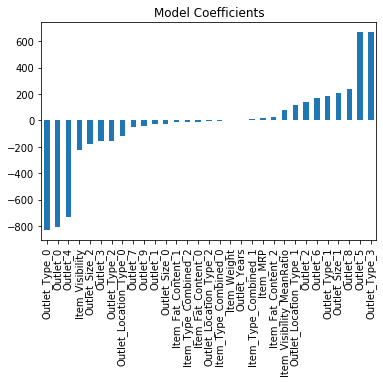

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
lin_reg = LinearRegression(normalize=True)
modelfit(lin_reg, train, test, predictors, target, IDcol, 'lin_reg.csv')
coef1 = pd.Series(lin_reg.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

The above mentioned model predicted some of the sales as negative values. Since the submission on [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#SolutionChecker) accepted only positive values, we could not submit this model. Though there were ways to get rid of the negative values, we preferred to submit the tree-based models, which yielded a decent score. 

### Ridge Regression Model 

Model report:
----------------------------------------
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


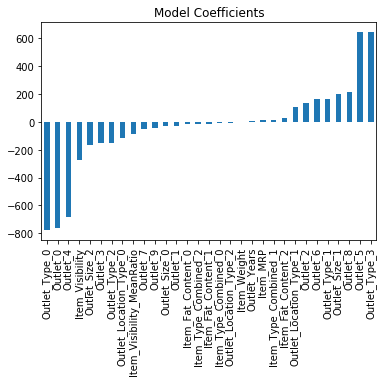

In [38]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
ridge_reg = Ridge(alpha=0.05,normalize=True)
modelfit(ridge_reg, train, test, predictors, target, IDcol, 'ridge_reg.csv')
coef2 = pd.Series(ridge_reg.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

### Decision Tree Model

Model report:
----------------------------------------
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186


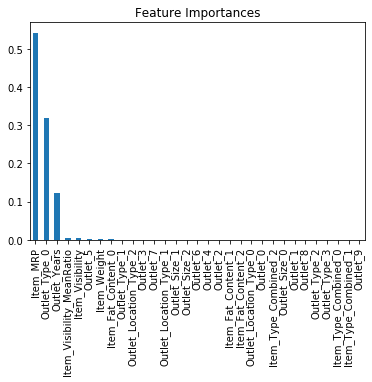

In [39]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
dec_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(dec_tree, train, test, predictors, target, IDcol, 'dec_tree.csv')
coef3 = pd.Series(dec_tree.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

The above mentioned decision tree model resulted into a leaderboard score of 1162.49724969602. Here you can see that the RMSE is 1058 and the mean CV error is 1091. It tells us that the model is slightly overfitting. So, we will try making a decision tree with just top 4 variables, a `max_depth` of 8 and `min_samples_leaf` as 150.

Model report:
----------------------------------------
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


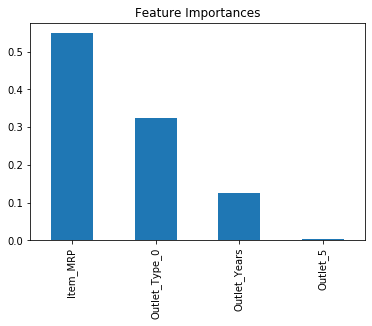

In [40]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
dec_tree_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(dec_tree_2, train, test, predictors, target, IDcol, 'dec_tree_2.csv')
coef4 = pd.Series(dec_tree_2.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

The above mentioned decision tree model resulted into a leaderboard score of 1156.89167845091.




### Random Forest Model

Model report:
----------------------------------------
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.88 | Min - 1020 | Max - 1160


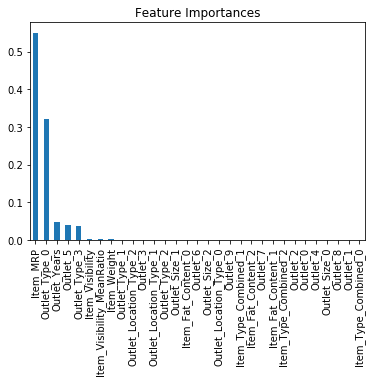

In [41]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
rand_for = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(rand_for, train, test, predictors, target, IDcol, 'rand_for.csv')
coef6 = pd.Series(rand_for.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')

The above mentioned random forest model resulted into a leaderboard score of 1152.96165866681. 

Next, we also tried TPOT (Tree-based Pipeline Optimization Tool). Though it enhanced the score by reducing the RMSE, it took more than 1.5 hours to train this model. 

In [42]:
# ! pip install tpot 

In [43]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(verbosity = 2,
#                      generations=7,
#                      population_size=100)

In [44]:
# tpot.fit(train[predictors], train[target])

In [45]:
# test[target] = tpot.predict(test[predictors])

# Export submission file:
# IDcol.append(target)
# submission = pd.DataFrame({ x: test[x] for x in IDcol})
# submission.to_csv('tpot.csv', index=False)

Thus, it can be concluded that random forest gave very good results, as compared to other models. It also helped to to get in top 18% (630/3638) of the submissions, where the top model was having an RMSE of 1128.19.

![leaderboard](images/leaderboard.png)
